Importing Required Libraries

In [2]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import pandas as pd


Load Preprocessed LastFM Data

In [3]:
# Load preprocessed LastFM data
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')
lastfm_targets = pd.read_csv('data/lastfm_targets_processed.csv')

print("LastFM network and targets loaded.")


LastFM network and targets loaded.


Community Detection Using Louvain Method

LastFM dataset modularity: 0.8151242433206816


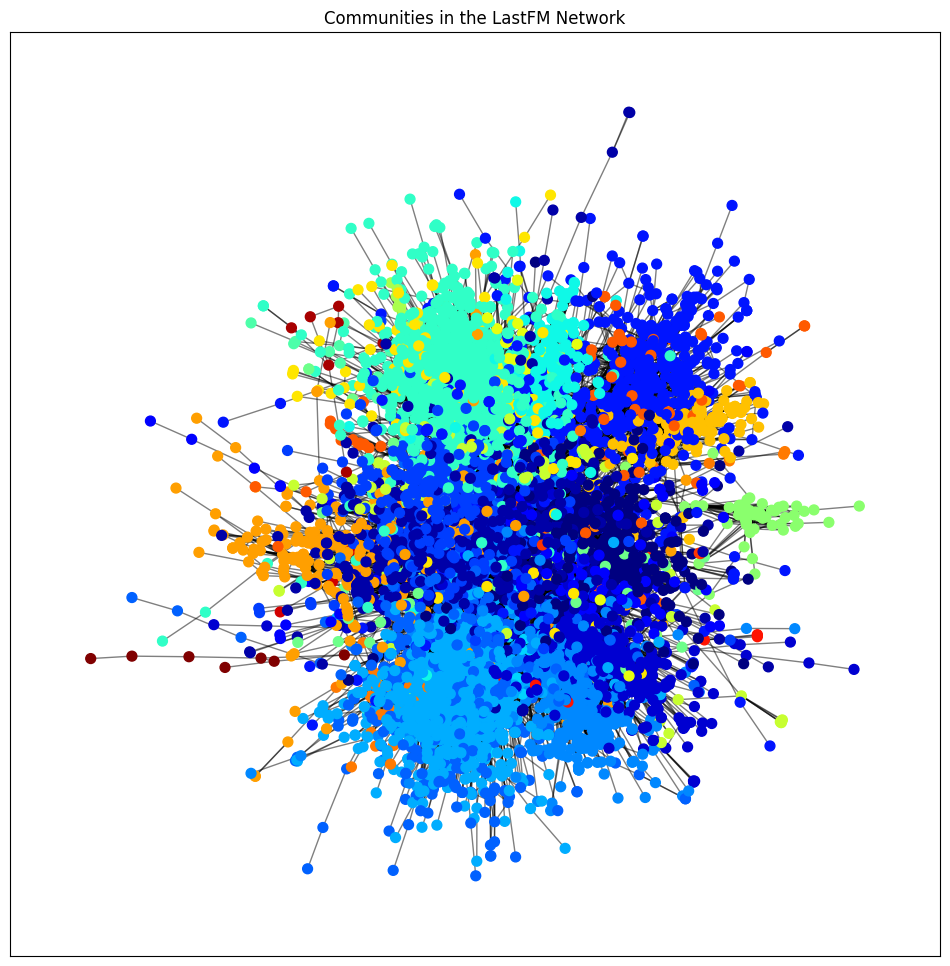

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

def load_lastfm_data(edge_file, target_file):
    """
    Load the LastFM dataset.

    Parameters:
    edge_file (str): Path to the file containing the edges of the LastFM network.
    target_file (str): Path to the file containing the target labels of the nodes.

    Returns:
    G (networkx.Graph): The LastFM network graph.
    targets (pandas.DataFrame): DataFrame of node targets.
    """
    edges = pd.read_csv(edge_file)
    G = nx.from_pandas_edgelist(edges, source='node_1', target='node_2')
    targets = pd.read_csv(target_file)
    return G, targets

def remove_isolated_nodes(G):
    """
    Remove isolated nodes from the graph.

    Parameters:
    G (networkx.Graph): The network graph.

    Returns:
    G (networkx.Graph): The graph without isolated nodes.
    """
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    return G

def calculate_modularity(G, partition):
    """
    Calculate the modularity of the graph given a partition.

    Parameters:
    G (networkx.Graph): The network graph.
    partition (dict): The partition of the nodes.

    Returns:
    modularity (float): The modularity score.
    """
    return community_louvain.modularity(partition, G)

def detect_communities_louvain(G):
    """
    Detect communities in the graph using the Louvain method.

    Parameters:
    G (networkx.Graph): The network graph.

    Returns:
    partition (dict): The partition of the nodes.
    """
    partition = community_louvain.best_partition(G)
    return partition

# Example usage
if __name__ == "__main__":
    # Load the LastFM data
    lastfm_graph, lastfm_targets = load_lastfm_data('data/lastfm_asia_edges.csv', 'data/lastfm_asia_target.csv')
    
    # Remove isolated nodes from the graph
    lastfm_graph = remove_isolated_nodes(lastfm_graph)
    
    # Detect communities using the Louvain method
    lastfm_partition = detect_communities_louvain(lastfm_graph)
    
    # Calculate modularity
    lastfm_modularity = calculate_modularity(lastfm_graph, lastfm_partition)
    print(f"LastFM dataset modularity: {lastfm_modularity}")
    
    # Define colors for communities
    community_colors = [lastfm_partition[node] for node in lastfm_graph.nodes()]

    # Draw the graph with node colors based on community
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(lastfm_graph, seed=42)  # For consistent layout
    nx.draw_networkx_nodes(lastfm_graph, pos, node_color=community_colors, cmap=plt.cm.jet, node_size=50)
    nx.draw_networkx_edges(lastfm_graph, pos, alpha=0.5)
    plt.title("Communities in the LastFM Network")
    plt.show()
    


In [7]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score

# True labels for nodes in the LastFM graph, extracted from lastfm_targets
true_labels_lastfm = [lastfm_targets[lastfm_targets['id'] == node]['target'].values[0] for node in lastfm_graph.nodes()]

# Detected communities using the Louvain method
louvain_labels_lastfm = [lastfm_partition[node] for node in lastfm_graph.nodes()]

# Calculate AMI and NMI
ami_lastfm = adjusted_mutual_info_score(true_labels_lastfm, louvain_labels_lastfm)
nmi_lastfm = normalized_mutual_info_score(true_labels_lastfm, louvain_labels_lastfm)

print(f"AMI score for LastFM dataset: {ami_lastfm}")
print(f"NMI score for LastFM dataset: {nmi_lastfm}")


AMI score for LastFM dataset: 0.6314340519946953
NMI score for LastFM dataset: 0.6355780750838663


LastFM dataset modularity: 0.8134687581354623


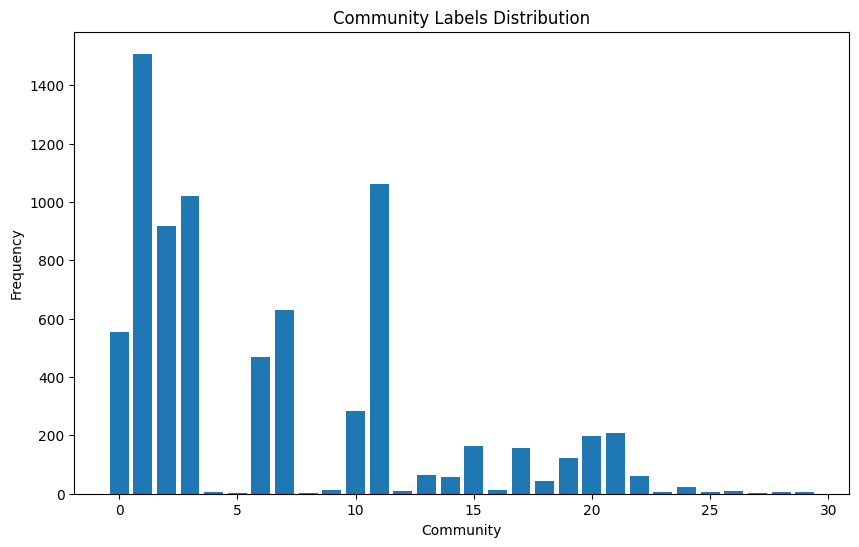

In [10]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import pandas as pd

# Load preprocessed LastFM data
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')
lastfm_targets = pd.read_csv('data/lastfm_targets_processed.csv')

# Example usage
if __name__ == "__main__":
    # Load the LastFM data
    lastfm_graph, lastfm_targets = load_lastfm_data('data/lastfm_asia_edges.csv', 'data/lastfm_asia_target.csv')
    
    # Remove isolated nodes from the graph
    lastfm_graph = remove_isolated_nodes(lastfm_graph)
    
    # Detect communities using the Louvain method
    lastfm_partition = detect_communities_louvain(lastfm_graph)
    
    # Calculate modularity
    lastfm_modularity = calculate_modularity(lastfm_graph, lastfm_partition)
    print(f"LastFM dataset modularity: {lastfm_modularity}")
    
    # Define colors for communities
    community_colors = [lastfm_partition[node] for node in lastfm_graph.nodes()]

    # Add the community labels to the DataFrame
    lastfm_targets['community'] = lastfm_targets['id'].map(lastfm_partition)
    
    # Group by community and count the occurrences
    community_distribution = lastfm_targets['community'].value_counts().sort_index()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(community_distribution.index, community_distribution.values, width=0.8)
    plt.xlabel('Community')
    plt.ylabel('Frequency')
    plt.title('Community Labels Distribution')
    plt.show()
